# Load dependencies
- Change oversample indices

In [1]:
# !python -m pip install -U SimpleITK
# !python -m pip install -U medpy

In [2]:
from __future__ import print_function

import SimpleITK as sitk
import sys
import os
import h5py
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import ndimage
from medpy.filter import IntensityRangeStandardization
from skimage import exposure


from functions.plot_slices import plot_slices

In [3]:
# Define the path + output path:
DIR = "/tf/notebooks/"
#OUTPUT_DIR = '/tf/notebooks/hezo/stroke_perfusion/callbacks/3D_CNN_ONTRAM_Zurich_mrs/'

# Import images

In [4]:
def decode_data(string):
    decoded_string = [n.decode("UTF-8", "ignore") for n in string]
    return(decoded_string)

In [5]:
# interpolate images and labels to have the same number of images per patient
def to_5d(X, Y_img, Y_pat, p_id, n_pix, n_img):
    n = len(np.unique(p_id))
    X_new = np.empty((n, n_pix, n_pix, n_img, X.shape[3]), dtype = "uint16")
    Y_img_new = np.zeros((n, n_img), dtype = 'int')
    Y_pat_new = np.zeros(n, dtype = 'int')
    p_id_new = np.zeros(n, dtype = 'int')
    
    for i, p in enumerate(np.unique(p_id)):
        # find patient and corresponding images
        k = np.where(p_id == p)[0]
        X_pat = X[k,:,:,:] # (30, 192, 192, 3)
        Y_img_pat = Y_img[k]
        # interpolate
        scale_factor = (n_img/X_pat.shape[0], n_pix/X_pat.shape[1], n_pix/X_pat.shape[2], 1)
        X_pat = ndimage.zoom(X_pat, scale_factor, mode = "nearest", order = 1) # (n_img, n_pix, n_pix, col_channel)
        Y_img_pat = ndimage.zoom(Y_img_pat, n_img/Y_img_pat.shape[0], order = 1)
        # assign data to new array
        for j in range(n_img):
            X_new[i,:,:,j,:] = X_pat[j,:,:,:]
        Y_img_new[i] = Y_img_pat
        Y_pat_new[i] = Y_pat[k][0]
        p_id_new[i] = p_id[k][0]
    return X_new, Y_img_new, Y_pat_new, p_id_new

In [6]:
if "dicom_2d_192x192x3_clean_interpolated_18_02_2021.h5" in os.listdir(DIR + "hezo/stroke_perfusion/data/"):
    # load interpolated data: already normalized
    with h5py.File(DIR + 'hezo/stroke_perfusion/data/dicom_2d_192x192x3_clean_interpolated.h5', "r") as h5:
        X = h5["X"][:]
        Y_img = h5["Y_img"][:]
        Y_pat = h5["Y_pat"][:]
        pat = h5["pat"][:]
else:
    # load Zürich data
    with h5py.File(DIR + 'data/dicom_2d_192x192x3_clean.h5', 'r') as h5:
        # print('H5-file: ', list(h5.keys()))
        # Image matrices
        X_zh = np.array(h5["X"][:])
        # Image label
        Y_img_zh = np.array(h5["Y"][:])
        # Patient labels (1=stroke, 0=TIA)
        Y_zh = np.array(h5["stroke"][:])
        # Patient ID's
        pat_zh = np.array(decode_data(h5["pat"][:]))
    
    # interpolate and save
    X_zh, Y_img_zh, Y_zh, pat_zh = to_5d(X_zh, Y_img_zh, Y_zh, pat_zh, 128, 30)
    print(X_zh.shape, Y_img_zh.shape, Y_zh.shape, pat_zh.shape)
    plot_slices(X_zh[0], pat_zh, "axial", modality = "DWI")
    with h5py.File(DIR + 'hezo/stroke_perfusion/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021.h5', "w") as h5:
        h5.create_dataset("X", data = X_zh)
        h5.create_dataset("Y_img", data = Y_img_zh)
        h5.create_dataset("Y_pat", data = Y_zh)
        h5.create_dataset("pat", data = pat_zh)

In [7]:
# # Pixel values between 0 and 1:
# X = X/255

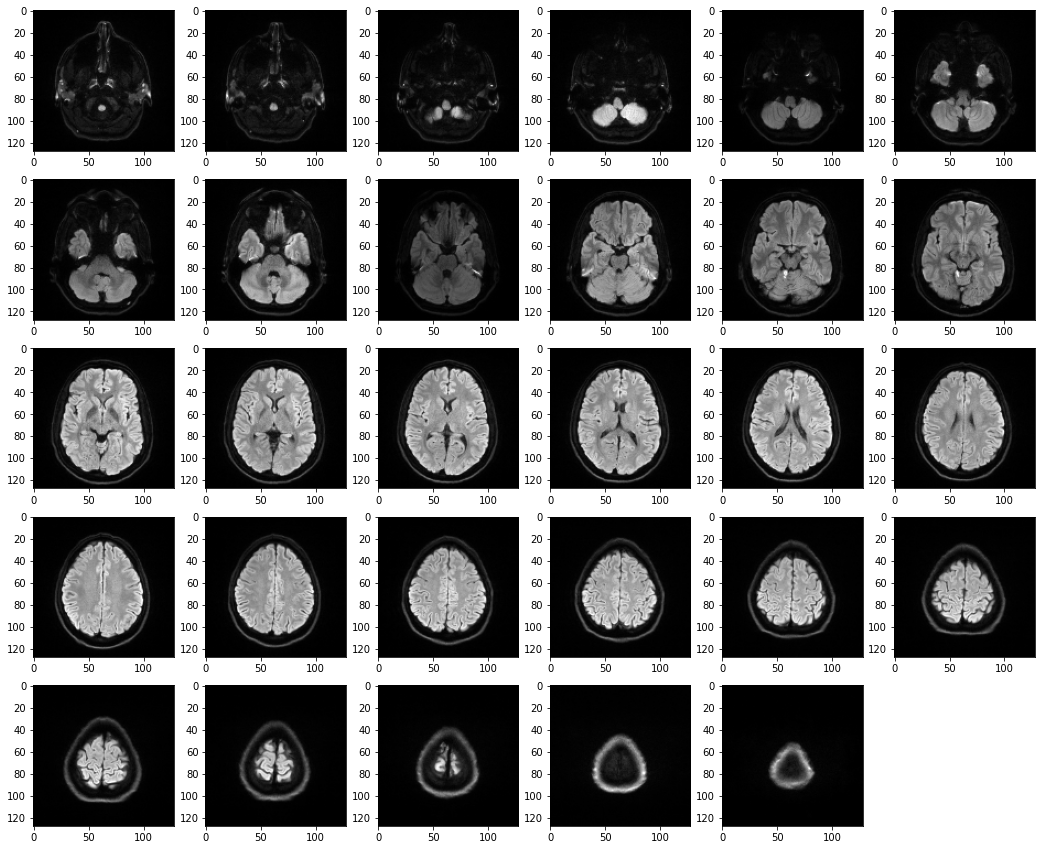

In [8]:
plot_slices(X[0], pat, "axial", modality = "DWI")

# Preprocessing
Images have different pixel intensities even within one patient, i.e. the same pixel intensities do not have the same meaning in terms of representing the same tissue/stroke

### Evaluate pixel intensities

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(30, 192, 192, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

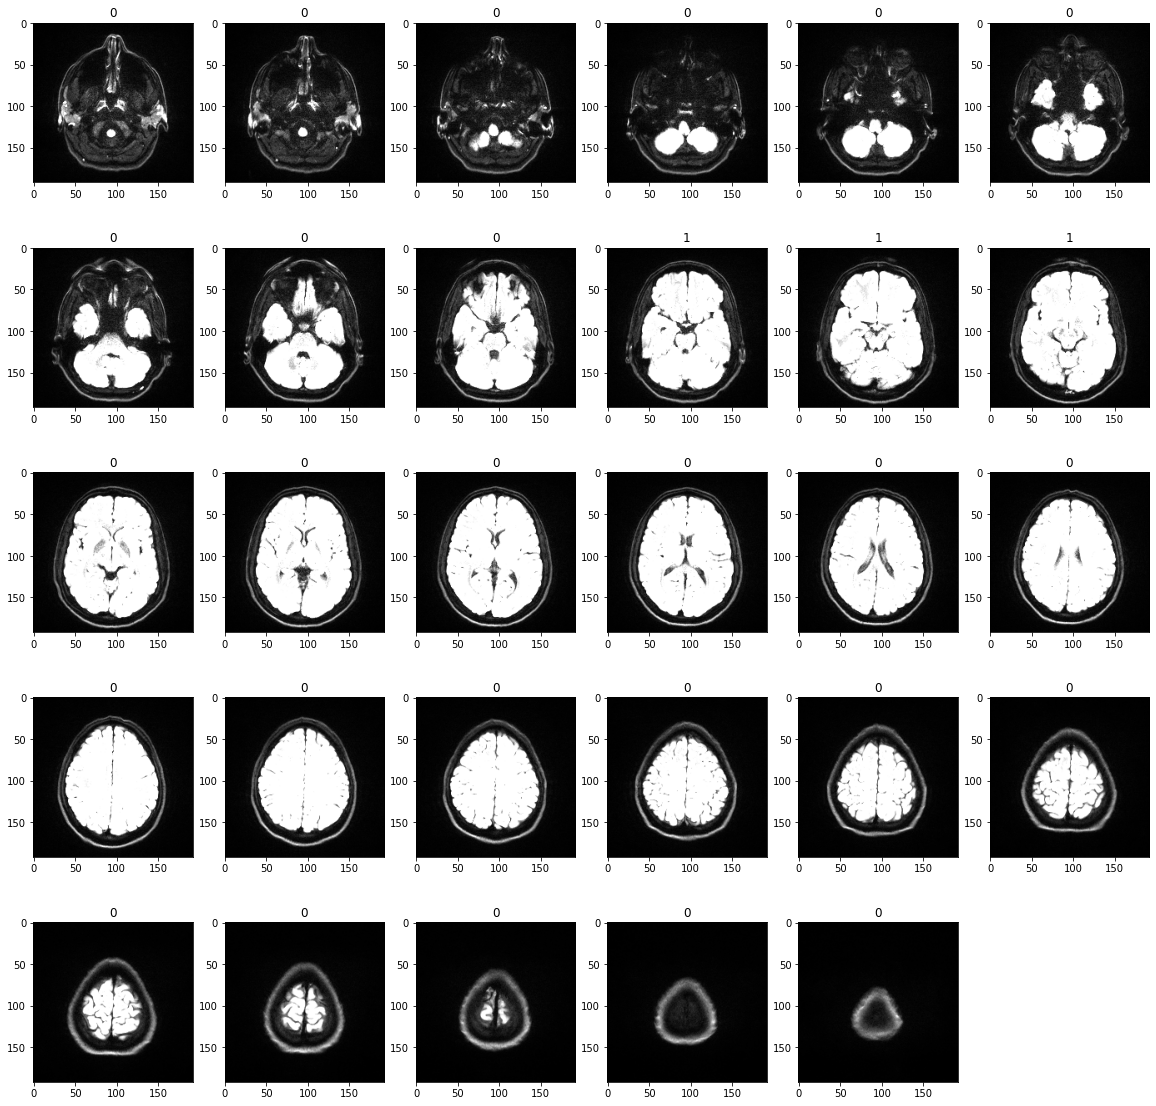

In [9]:
# original DICOM data
with h5py.File(DIR + 'data/dicom_2d_192x192x3_clean.h5', 'r') as h5:
    # print('H5-file: ', list(h5.keys()))
    # Image matrices
    X_zh = np.array(h5["X"][:])
    # Image label
    Y_img_zh = np.array(h5["Y"][:])
    # Patient labels (1=stroke, 0=TIA)
    Y_zh = np.array(h5["stroke"][:])
    # Patient ID's
    pat_zh = np.array(decode_data(h5["pat"][:]))
    
k = np.where(pat_zh == '001')[0]
X_pat = X_zh[k]
Y_img_pat = Y_img_zh[k]
print(X_pat.shape)

fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 6
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[i,:,:,:]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[i])
    plt.imshow(img, cmap='viridis')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input dat

(1, 128, 128, 30, 3) (1, 30)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

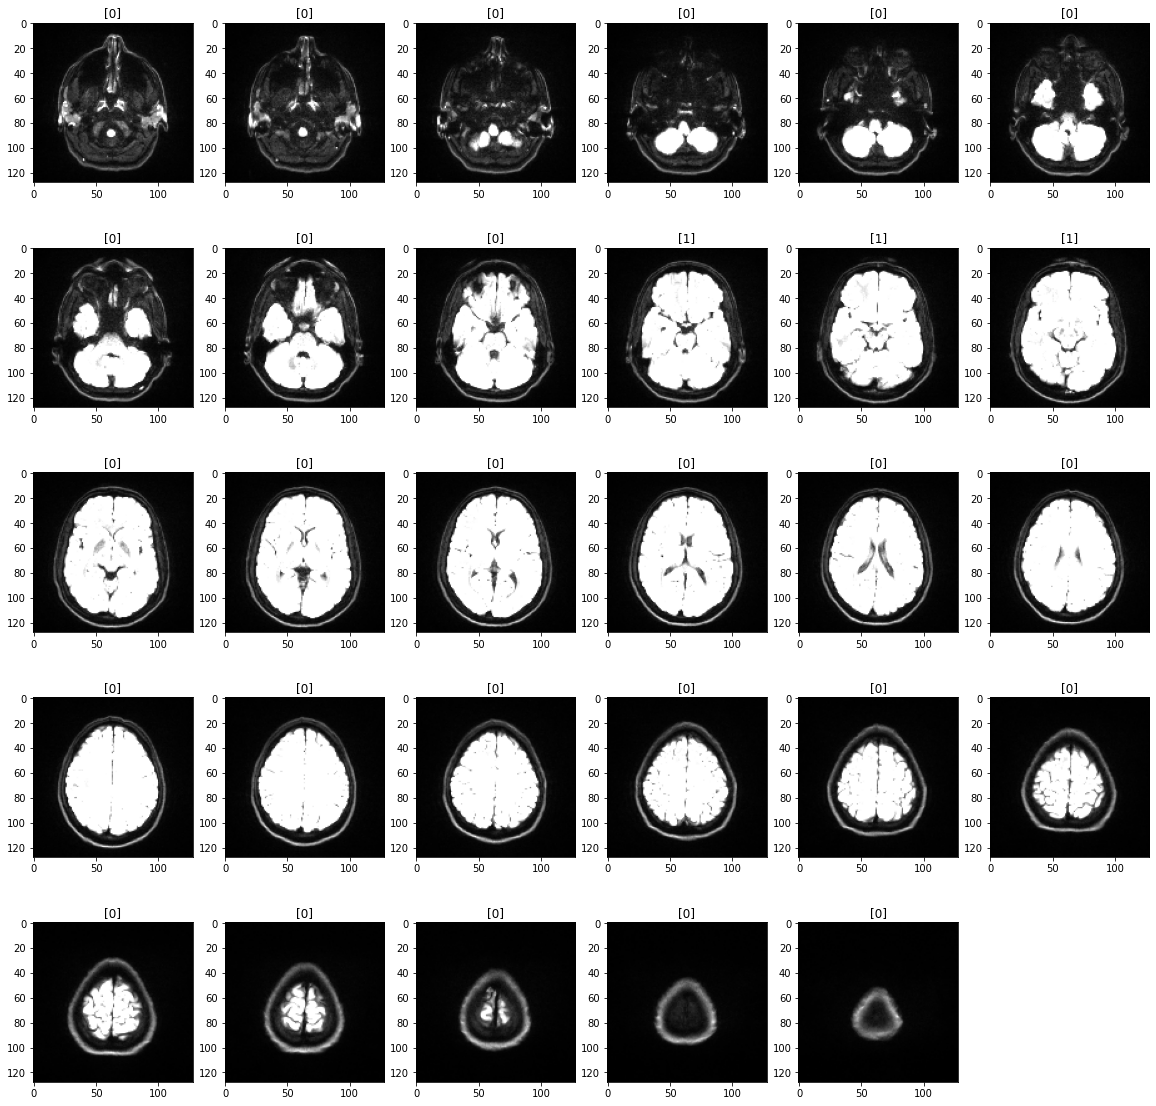

In [10]:
with h5py.File(DIR + 'hezo/stroke_perfusion/data/dicom_2d_192x192x3_clean_interpolated_18_02_2020.h5', "r") as h5:
    X = h5["X"][:]
    Y_img = h5["Y_img"][:]
    Y_pat = h5["Y_pat"][:]
    pat = h5["pat"][:]
        
k = np.where(pat == 1)[0]
X_pat = X[k]
Y_img_pat = Y_img[k]
print(X_pat.shape, Y_img_pat.shape)

fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 6
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[0,:,:,i,:]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[:,i])
    plt.imshow(img, cmap='viridis')
plt.show()

In [11]:
# # Consider two images with different intesnities
# print(X_pat.shape)
# img11 = X_pat[0,:,:,11]
# img12 = X_pat[0,:,:,12]
# 
# fig, axs = plt.subplots(2, 2)
# axs[0,0].imshow(img11, cmap = "gray")
# axs[0,1].imshow(img12, cmap = "gray")
# _ = axs[1,0].hist(img11.flatten())
# _ = axs[1,1].hist(img12.flatten())

### Remove artefacts

In [12]:
# remove the last two images of the patient and consider only one color channel
# Sometimes the images on the top look confusing and the strokes are not only on them!
print(X.shape, Y_img.shape, Y_pat.shape, pat.shape)
# np.where(Y_img[:,29:30] == 1)
X = X[:,:,:,:28,0]
Y_img = Y_img[:,:28]
print(X.shape, Y_img.shape, Y_pat.shape, pat.shape)

(439, 128, 128, 30, 3) (439, 30) (439,) (439,)
(439, 128, 128, 28) (439, 28) (439,) (439,)


(439, 128, 128, 28)


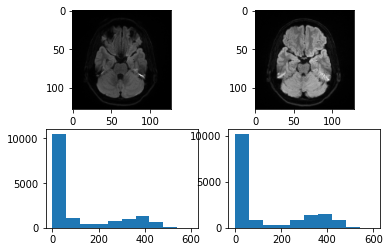

In [13]:
# Consider two images with different intesnities: appearance is different but histograms match now!
print(X.shape)
img11 = X[0,:,:,9]
img12 = X[0,:,:,10]

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(img11, cmap = "gray")
axs[0,1].imshow(img12, cmap = "gray")
_ = axs[1,0].hist(img11.flatten(), range=[0,600])
_ = axs[1,1].hist(img12.flatten(), range=[0,600])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 128, 128, 30, 3)


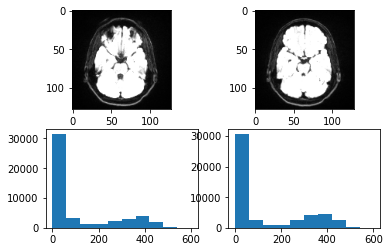

In [14]:
# Consider two images with different intesnities
print(X_pat.shape)
img11 = X_pat[0,:,:,9]
img12 = X_pat[0,:,:,10]

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(img11, cmap = "gray")
axs[0,1].imshow(img12, cmap = "gray")
_ = axs[1,0].hist(img11.flatten(), range=[0,600])
_ = axs[1,1].hist(img12.flatten(), range=[0,600])

### Normalization

In [15]:
# normalize intensities to have pixel values between 0 and 255
def normalize(img):
    lmin = float(img.min())
    lmax = float(img.max())
    return np.floor((img - lmin)/(lmax - lmin)*255)

In [16]:
X_norm = np.empty_like(X)
for i in range(X_norm.shape[0]):
    X_norm[i] = normalize(X[i])

In [17]:
print(X.shape, X.min(), X.max())
print(X_norm.shape, X_norm.min(), X_norm.max())

(439, 128, 128, 28) 0 5254
(439, 128, 128, 28) 0 255


(439, 128, 128, 28)


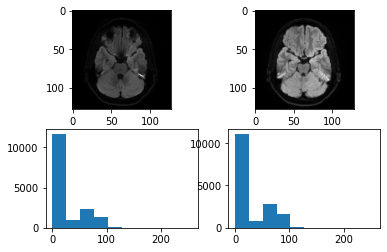

In [18]:
# Consider two images with different intensities
print(X_norm.shape)
img11 = X_norm[0,:,:,9]
img12 = X_norm[0,:,:,10]

fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(img11, cmap = "gray")
axs[0,1].imshow(img12, cmap = "gray")
_ = axs[1,0].hist(img11.flatten(), range=[0,255])
_ = axs[1,1].hist(img12.flatten(), range=[0,255])

### Bias Field Correction

In [19]:
# get 2D image from array (for 3D image, isVector = True)
image = sitk.GetImageFromArray(X_norm[0,:,:,0], isVector = False)

In [20]:
# Bias Field Correction

# Otsu Threshold: Separate foreground and background pixels: 
# inside value = darkest part (0), outside value = brightest part = (1), 200 = number of bins
# mask = sitk.OtsuThreshold(image, 0, 255, 200)
mask = sitk.OtsuThreshold(image, 0, 255, 200)
image = sitk.Cast(image, sitk.sitkFloat32)
corrector = sitk.N4BiasFieldCorrectionImageFilter()
output = corrector.Execute(image, mask)
# log_bias_field = corrector.GetLogBiasFieldAsImage(image)
# output = image/sitk.Exp(log_bias_field)

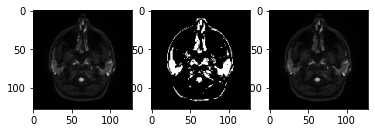

In [21]:
i = sitk.GetArrayViewFromImage(image)[:,:]
m = sitk.GetArrayViewFromImage(mask)[:,:]
o = sitk.GetArrayViewFromImage(output)[:,:]
fig, axs = plt.subplots(1, 3)
axs[0].imshow(i, cmap = "gray")
axs[1].imshow(m, cmap = "gray")
axs[2].imshow(o, cmap = "gray")

In [22]:
# images look similar after bias field correction?
print(i.mean(), o.mean(), o.std(), i.std())

5.1918335 5.1918335 8.635537 8.635537


In [23]:
# do bias field correction for all images across all patients
X_bf = np.empty_like(X_norm)
corrector = sitk.N4BiasFieldCorrectionImageFilter()
for i in range(X_norm.shape[0]): #iterate over patients
    for j in range(X_norm.shape[3]): #iterate over images
        image = sitk.GetImageFromArray(X_norm[i,:,:,j], isVector = False)
        mask = sitk.OtsuThreshold(image, 0, 255, 200)
        image = sitk.Cast(image, sitk.sitkFloat32)
        output = corrector.Execute(image, mask)
        X_bf[i,:,:,j] = sitk.GetArrayViewFromImage(output)[:,:]

In [24]:
X_bf.shape

(439, 128, 128, 28)

(128, 128, 28) (28,)


IndexError: index 28 is out of bounds for axis 2 with size 28

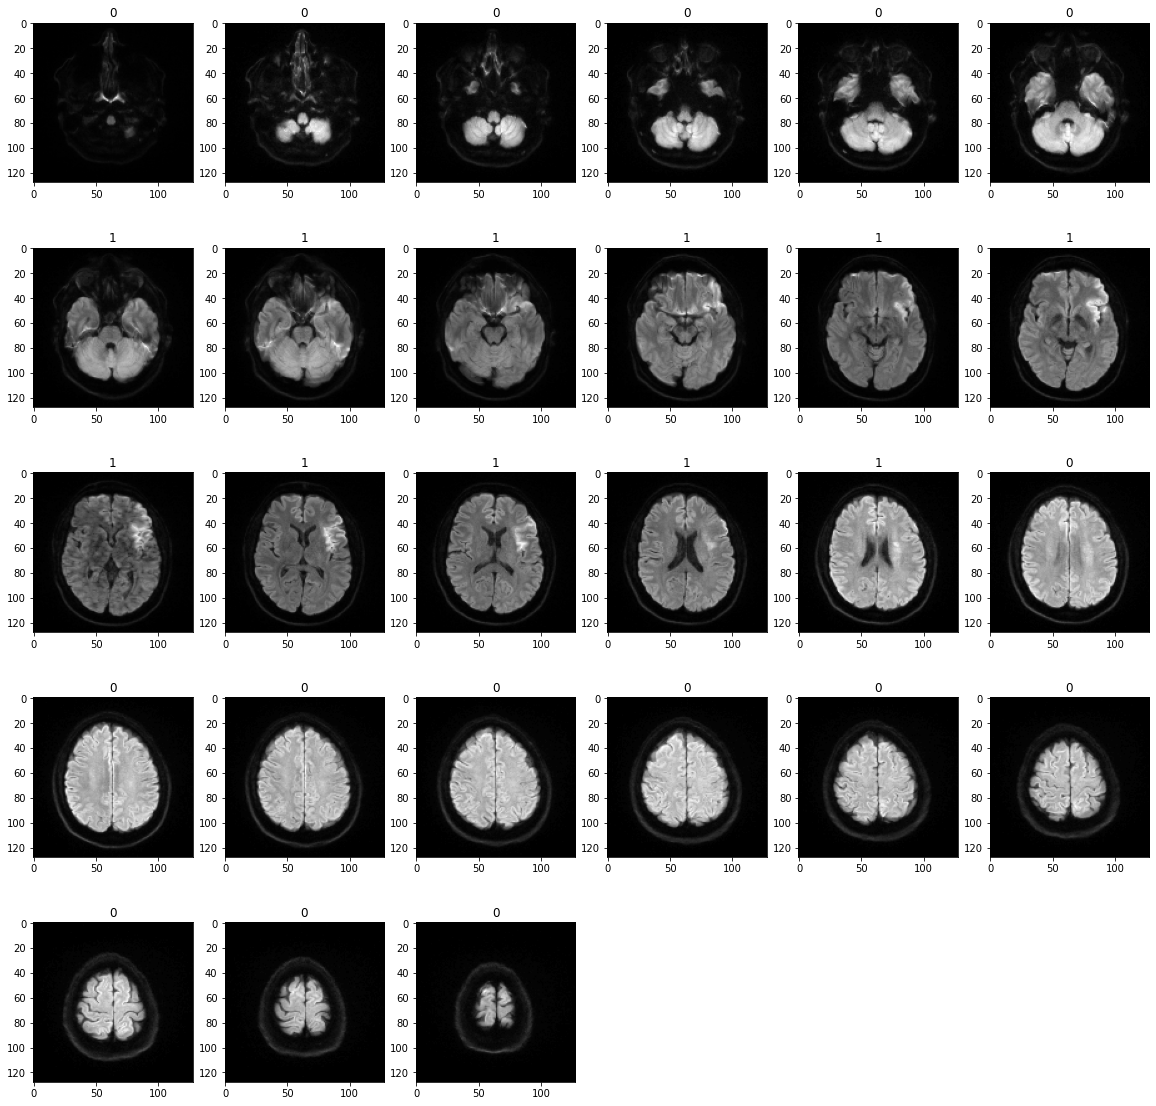

In [25]:
k = 1
X_pat = X_bf[k]
Y_img_pat = Y_img[k]
print(X_pat.shape, Y_img_pat.shape)

fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 6
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[i])
    plt.imshow(img, cmap = "gray")
plt.show()

IndexError: index 28 is out of bounds for axis 2 with size 28

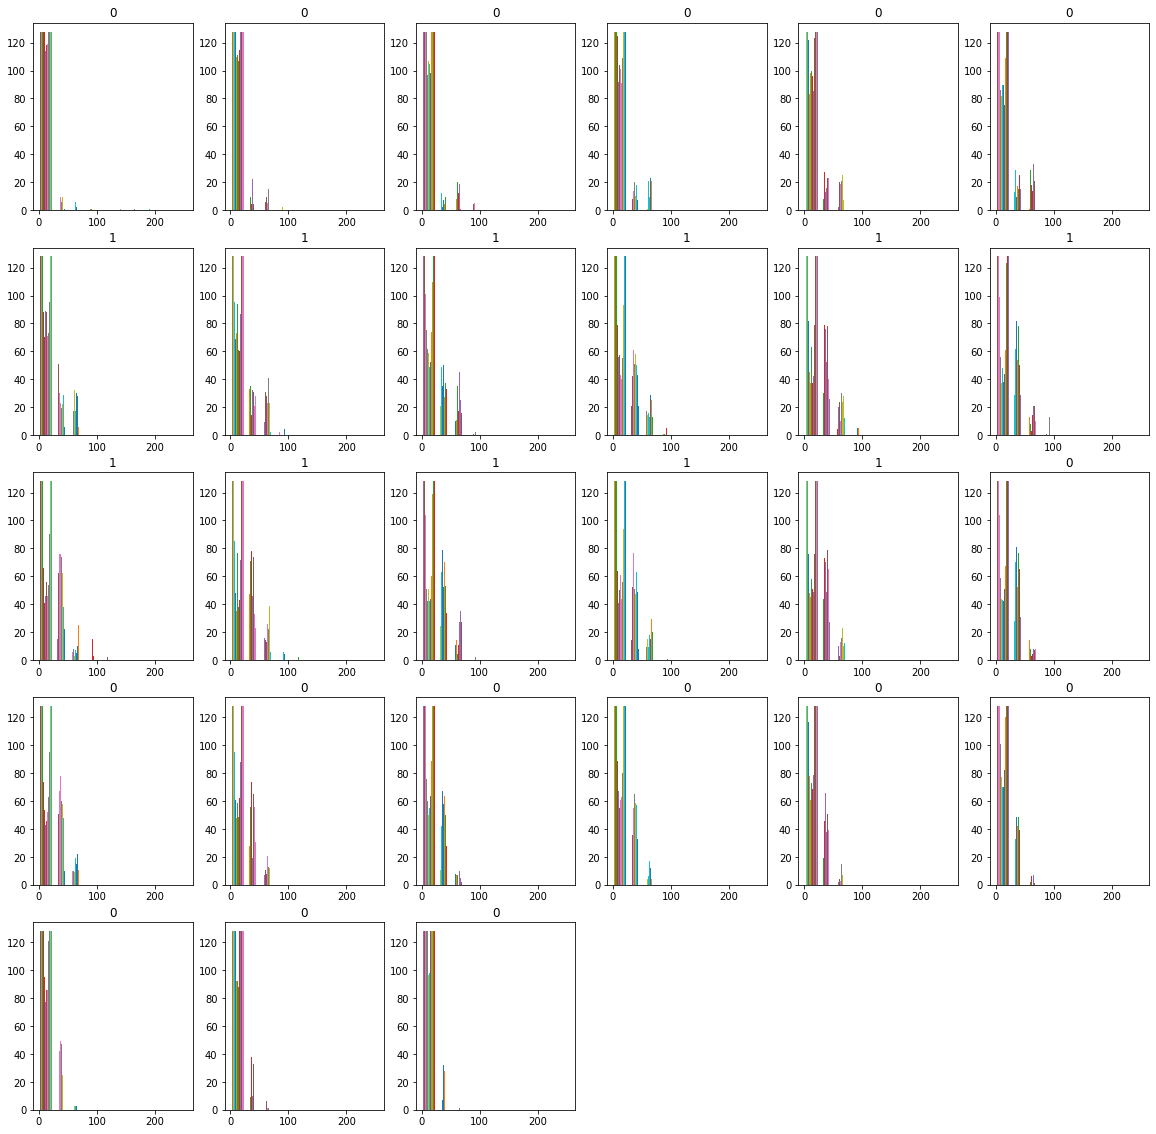

In [26]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 6
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[i])
    plt.hist(img, range = [0, 255])
plt.show()

### Intensity normalization

#### 1. Z-score normalization based on brain mask (per patient not per image anymore!!!!!)
https://github.com/deepmedic/deepmedic/issues/72

Value of mask:  (array([  0, 255], dtype=uint8), array([15032,  1352]))


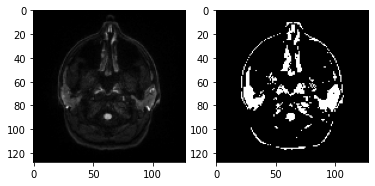

In [27]:
X_pat = X_bf[0,:,:,:]
j = 0
i = sitk.GetImageFromArray(X_pat[:,:,j], isVector = False)
m = sitk.OtsuThreshold(i, 0, 255, 200)
image = sitk.GetArrayViewFromImage(i)[:,:]
mask = sitk.GetArrayViewFromImage(m)[:,:]
print("Value of mask: ", np.unique(mask, return_counts=True))
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap = "gray")
axs[1].imshow(mask, cmap = "gray")

25.304651162790698 8.315730498009295


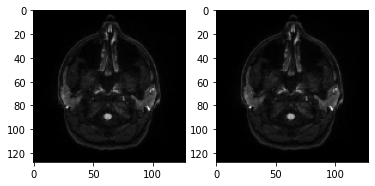

In [28]:
# mask is represented by white pixels
mask_idx = np.where(mask == 255)
image_mask = image[mask_idx]
# exclude low and high intensity pixel values for mean and std calculation
image_maskp = image_mask[(image_mask >= np.percentile(image_mask, 5)) & 
                         (image_mask <= np.percentile(image_mask, 95))]
# get mean and std
image_mask_mean = image_maskp.mean()
image_mask_std = image_maskp.std()
print(image_mask_mean, image_mask_std)
image_new = (image - image_mask_mean)/image_mask_std
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image, cmap = "gray")
axs[1].imshow(image_new, cmap = "gray")

In [29]:
image_maskp.shape

(1290,)

In [30]:
# z score based on brain mask
def z_score_normalization(X, xmin, xmax):
    # X: [xdim, ydim, zdim]
    # xmin, xmax: pixel intensities
    X_norm = np.empty((X.shape[0], X.shape[1], X.shape[2]))
    image_maskp_pat = []
    for j in range(X_norm.shape[2]):
        i = sitk.GetImageFromArray(X[:,:,j], isVector = False)
        m = sitk.OtsuThreshold(i, xmin, xmax, 200)
        image = sitk.GetArrayViewFromImage(i)[:,:]
        mask = sitk.GetArrayViewFromImage(m)[:,:]
        # mask is represented by white pixels
        mask_idx = np.where(mask == mask.max())
        image_mask = image[mask_idx]
        # exclude low and high intensity values
        image_maskp = image_mask[(image_mask >= np.percentile(image_mask, 5)) & 
                                 (image_mask <= np.percentile(image_mask, 95))]
        image_maskp_pat.append(image_maskp)
        
    # get mean and std per patient based on all image masks
    image_maskp_pat = np.concatenate(image_maskp_pat)
    image_mask_mean = np.mean(image_maskp_pat)
    image_mask_std = np.std(image_maskp_pat)
    # print(image_mask_mean, image_mask_std)
    
    for j in range(X_norm.shape[2]):
        image = X[:,:,j]
        X_norm[:,:,j] = (image - image_mask_mean) / image_mask_std
    return X_norm

In [31]:
j = 0
X_pat = X_bf[j]
Y_img_pat = Y_img[j]
X_pat_norm = z_score_normalization(X_pat, 0, 255)
print(X_pat_norm.min(), X_pat_norm.max())

-4.585254174702963 14.155061972522223


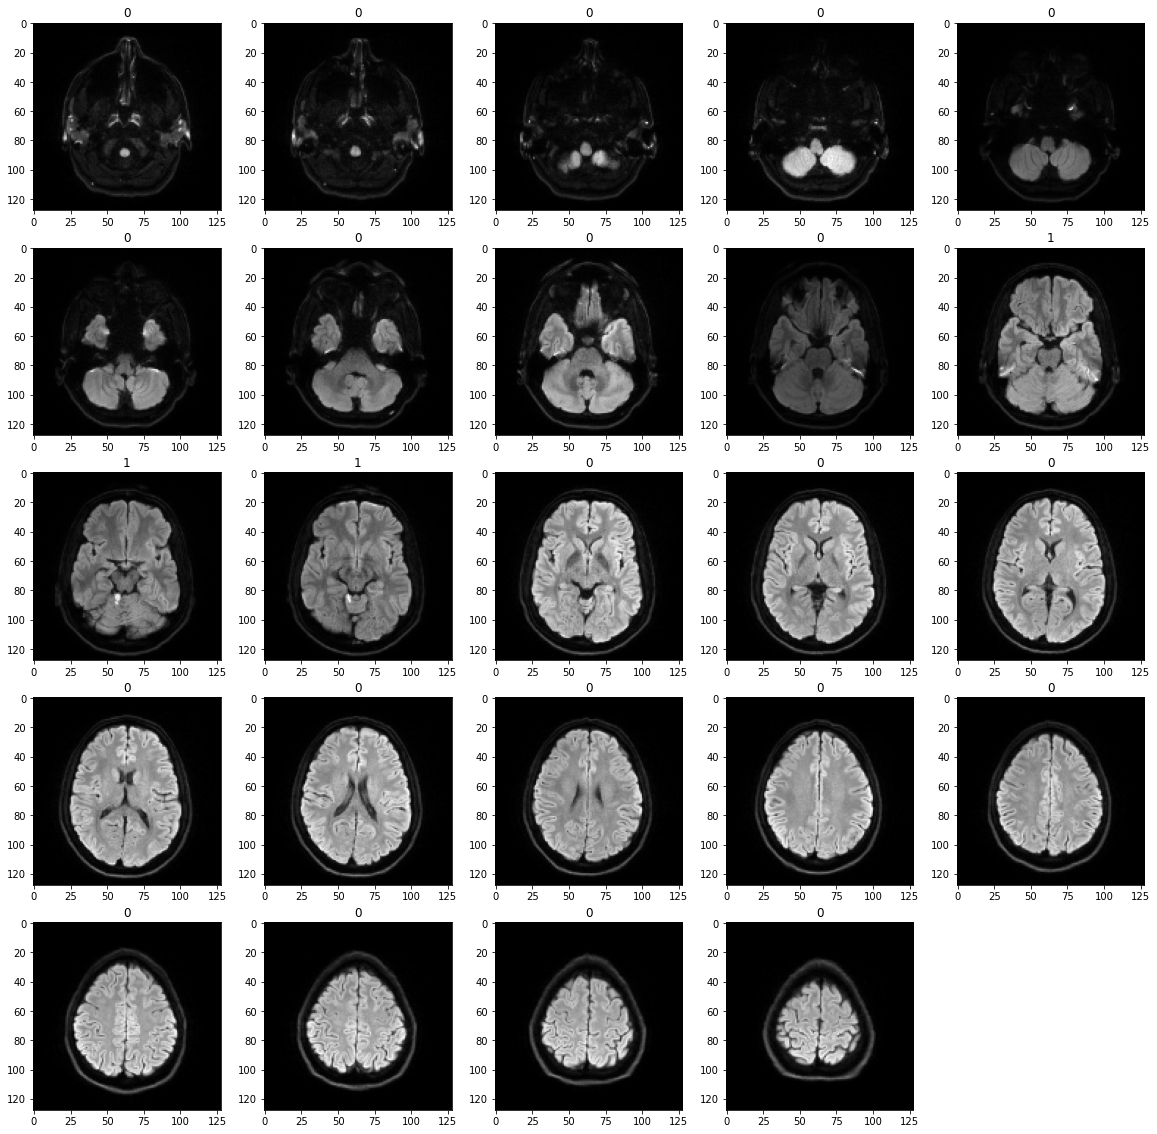

In [32]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat_norm[:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[i])
    plt.imshow(img, cmap = "gray")
plt.show()

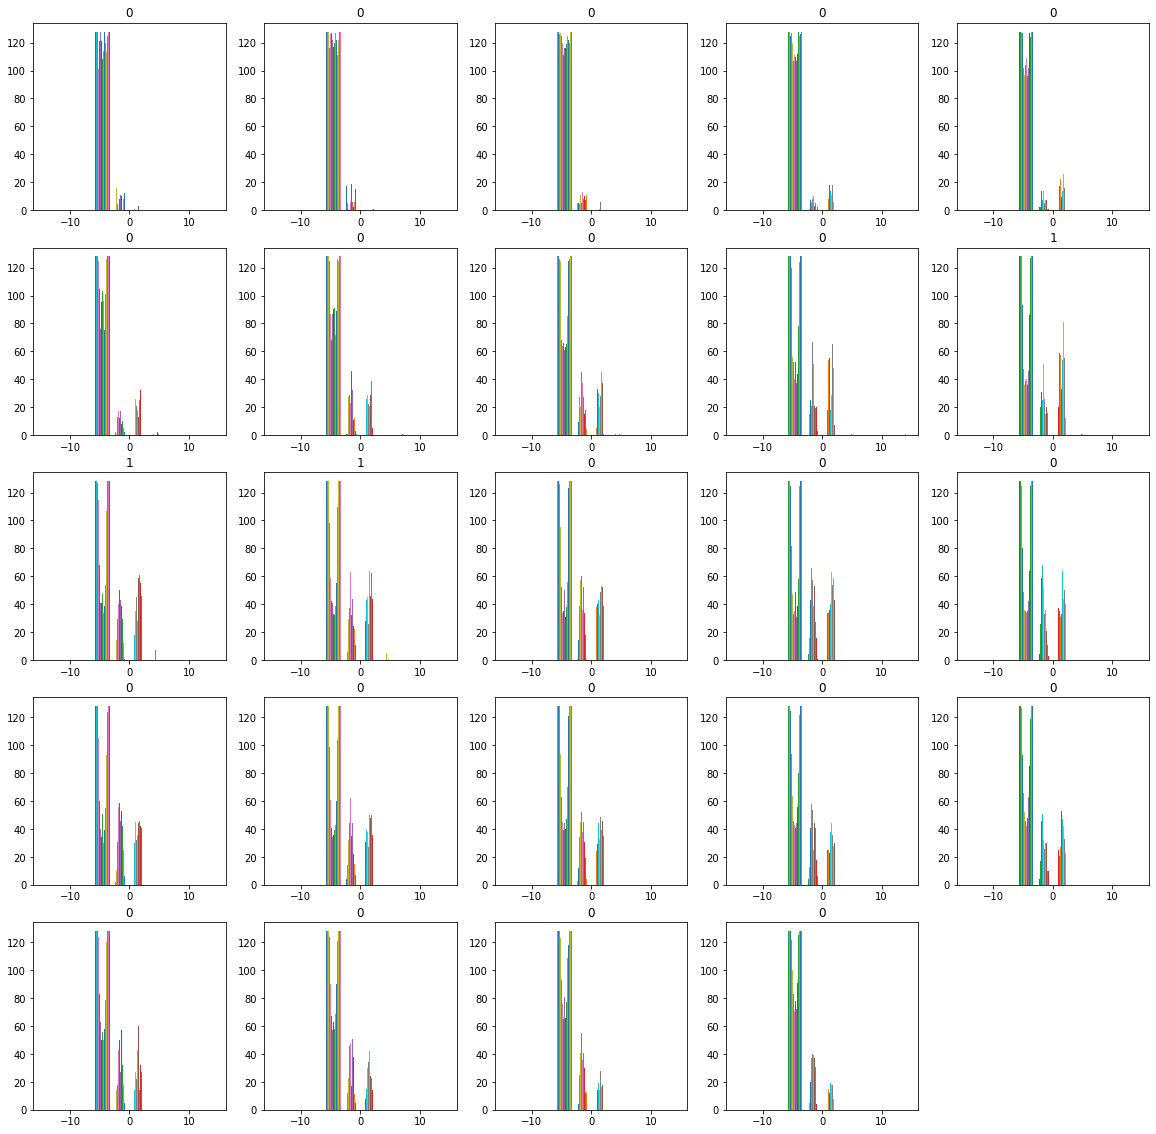

In [33]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat_norm[:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[i])
    plt.hist(img, range = [-15, 15])
plt.show()

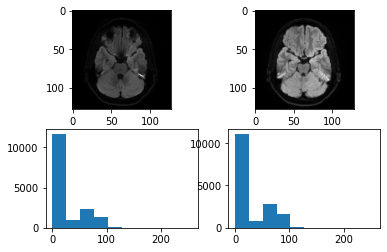

In [34]:
i = 9
j = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(X_pat[:,:,i], cmap = "gray")
axs[0,1].imshow(X_pat[:,:,j], cmap = "gray")
_ = axs[1,0].hist(X_pat[:,:,i].flatten(), range = [0,255])
_ = axs[1,1].hist(X_pat[:,:,j].flatten(), range = [0,255])

(0.0, 200.0)

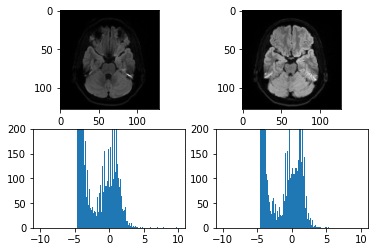

In [35]:
i = 9
j = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(X_pat_norm[:,:,i], cmap = "gray")
axs[0,1].imshow(X_pat_norm[:,:,j], cmap = "gray")
_ = axs[1,0].hist(X_pat_norm[:,:,i].flatten(), range = [-10, 10], bins = 200)
axs[1,0].set_ylim([0, 200])
_ = axs[1,1].hist(X_pat_norm[:,:,j].flatten(), range = [-10, 10], bins = 200)
axs[1,1].set_ylim([0, 200])

In [36]:
# normalize for all patients
X_norm = np.empty((X_bf.shape[0], X_bf.shape[1], X_bf.shape[2], X_bf.shape[3]))
for i in range(X_norm.shape[0]):
    X_norm[i] = z_score_normalization(X_bf[i], 0, 255)
print(X_norm.min(), X_norm.max())

-6.6210444036187965 33.72014085577758


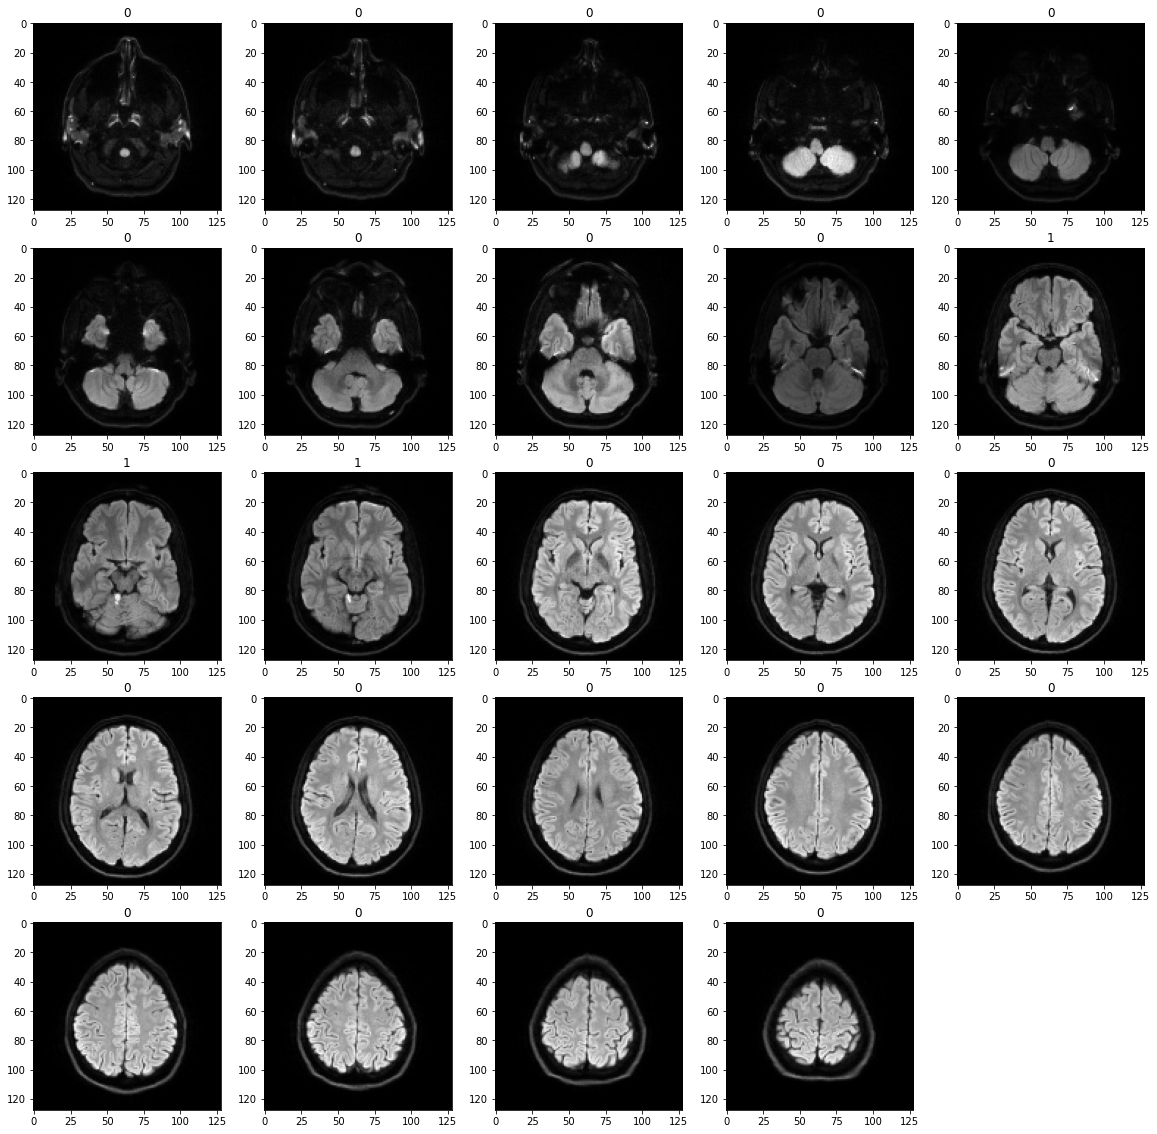

In [37]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_norm[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img[0,i])
    plt.imshow(img, cmap = "gray")
plt.show()

#### 2. Histogram Equalization
Does not work well when we have lots of background...Not really adequate for our application
- Does not seem to be necessary after having read in the data correctly

In [ ]:
# # histogram equalization: Contrast stretching
# p2, p98 = np.percentile(img11, (65, 98))
# img11_eq = exposure.rescale_intensity(img11, in_range=(p2, p98))
# p2, p98 = np.percentile(img12, (65, 98))
# img12_eq = exposure.rescale_intensity(img12, in_range=(p2, p98))
# 
# fig, axs = plt.subplots(2, 2)
# axs[0,0].imshow(img11_eq, cmap = "gray")
# axs[0,1].imshow(img12_eq, cmap = "gray")
# _ = axs[1,0].hist(img11_eq.flatten())
# _ = axs[1,1].hist(img12_eq.flatten())

In [ ]:
# # histogram equalization: equalization
# img11_eq = exposure.equalize_hist(img11)
# img12_eq = exposure.equalize_hist(img12)
# 
# fig, axs = plt.subplots(2, 2)
# axs[0,0].imshow(img11_eq, cmap = "gray")
# axs[0,1].imshow(img12_eq, cmap = "gray")
# _ = axs[1,0].hist(img11_eq.flatten())
# _ = axs[1,1].hist(img12_eq.flatten())

In [ ]:
# # histogram equalization: adaptive equalization
# img11_eq = exposure.equalize_adapthist(img11/255, nbins = 1024)
# img12_eq = exposure.equalize_adapthist(img12/255, nbins = 1024)
# 
# fig, axs = plt.subplots(2, 2)
# axs[0,0].imshow(img11_eq, cmap = "gray")
# axs[0,1].imshow(img12_eq, cmap = "gray")
# _ = axs[1,0].hist(img11_eq.flatten())
# _ = axs[1,1].hist(img12_eq.flatten())

In [ ]:
# # For all images, do adaptive equalization
# def hist_equalization(X):
#     X_eq = np.empty_like(X)
#     for p in range(X_eq.shape[0]):
#         for i in range(X_eq.shape[3]):
#             X_eq[p,:,:,i,0] = exposure.equalize_adapthist(X[p,:,:,i,0]/255, nbins = 1024)
#     return X_eq    
# X_eq = hist_equalization(X)
# #X_pat_eq = hist_equalization(X_pat)

In [ ]:
# fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
# columns = 5
# rows = 5
# fig_all = []
# for i in range(1, columns*rows):
#     img = X_eq[0,:,:,i,0]
#     fig_all.append(fig.add_subplot(rows, columns, i))
#     fig_all[-1].set_title(Y_img_pat[:,i])
#     plt.imshow(img, cmap='gray')
# plt.show()

In [ ]:
# fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
# columns = 5
# rows = 5
# fig_all = []
# for i in range(1, columns*rows):
#     img = X_eq[0,:,:,i,0]
#     fig_all.append(fig.add_subplot(rows, columns, i))
#     fig_all[-1].set_title(Y_img_pat[:,i])
#     plt.hist(img.flatten(), bins = 500)
#     plt.ylim([0, 300])
# plt.show()

#### 3. Intensity normalization with Nyul
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=836373
I don't think that we need this one...Doesn't run well and images do not seem to be better than with z-score normalization. Go with z-score normlization

In [ ]:
# # Copyright (C) 2013 Oskar Maier
# # 
# # This program is free software: you can redistribute it and/or modify
# # it under the terms of the GNU General Public License as published by
# # the Free Software Foundation, either version 3 of the License, or
# # (at your option) any later version.
# # 
# # This program is distributed in the hope that it will be useful,
# # but WITHOUT ANY WARRANTY; without even the implied warranty of
# # MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# # GNU General Public License for more details.
# # 
# # You should have received a copy of the GNU General Public License
# # along with this program.  If not, see <http://www.gnu.org/licenses/>.
# #
# # author Oskar Maier
# # version r0.1.2
# # since 2013-09-04
# # status Release
# 
# # build-in modules
# 
# # third-party modules
# import numpy
# from scipy.interpolate.interpolate import interp1d
# 
# # path changes
# 
# # own modules
# 
# # code
# class IntensityRangeStandardization (object):
#     r"""
#     Class to standardize intensity ranges between a number of images.
#     
#     **Short description:**
#     Often images containing similar objects or scenes have different intensity ranges
#     that make it difficult to compare them manually as well as to process them
#     further.
#     
#     IntensityRangeStandardization offers a way to transform a number of such images
#     intensity ranges to a common standard intensity space without any loss of
#     information using a multi-segment linear transformation model.
#     
#     Once learned, this model can be applied to other, formerly unseen images to map
#     them to the same standard intensity space.    
#             
#     **Concept of similar images:**
#     IntensityRangeStandardization is limited to similar images. Images containing
#     different object or different compositions of objects are not suitable to be
#     transformed to a common intensity space (and it would furthermore not make much
#     sense).
#     
#     A typical application of IntensityRangeStandardization are MRI images showing the
#     same body region. These often have different intensity ranges, even when acquired
#     from the same patient and using the same scanner. For further processing, e.g.
#     for training a classifier, they have to be mapped to a common intensity space.
#     
#     **Failure of the transformation:**
#     The method implemented in IntensityRangeStandardization ensures that no
#     information is lost i.e. a lossless transformation is performed. This can be
#     assured when there exists a one-to-one mapping between the images original
#     intensity values and their values mapped to the standard intensity space.
#     
#     But since the transformation model is trained on, and the standard intensity
#     space range selected over the training images, this can not be guaranteed for all
#     formerly unseen image. If they differ greatly from the training set images, a
#     lossless transformation can not be assured anymore. In this case the transform()
#     method will throw an InformationLossException.
#     
#     Should this happen, the model needs to be re-trained with the original training
#     images and additionally the images which caused the failure. Since this will lead
#     to a new intensity standard space, all already transformed images have to be
#     processed again.
#     
#     **Setting the training parameters:**
#     The method comes with a set of default parameters, that are suitable for most
#     cases. But for some special cases, it might be better to set them on your own. Ti
#     understand the working of the parameters, it is recommended to read the detailed
#     method description first.
#     
#     **The method depends on three parameters:**
#     
#     cutoffp, i.e. the cut-off percentiles
#         These are used to the define the intensity outliers, both during training and
#         image transformation. The default values are usualy a good choice.
#         (in [1]_ these are called the minimum and maximum percentile values pc1 and pc2 respectively)
#     landmarkp, i.e. the landmark percentiles
#         These percentiles define the landmark positions. The more supplied, the more
#         exact but less general becomes the model. It is common to supply equally
#         spaced percentiles between 0 and 100.
#         (in [1]_ these are called the landmark locations mu_1, .., mu_l)
#     strange, i.e. the standard intensity space range
#         These two intensity values define roughly the standard intensity space (or
#         common intensity space of the images; or even target intensity space) to
#         which each images intensities are mapped. This space can be supplied, but it
#         is usually recommended to let the method select it automatically during the
#         training process. It is additionally possible to supply only the lower or
#         upper range border and set the other to ''auto'', in which case the method
#         chooses the range automatically, but not the position. 
#         (in [1]_ these are called the minimum and maximum intensities on the standard scale of the IOI s1 resp. s2)
#     
#     
#     **Details of the method:**
#     In the following the method is described in some more detail. For even more
#     information see [1]_.
#          
#     Essentially the method is based on a multi-segment linear transformation model. A
#     standard intensity space (or common intensity space) is defined by an intensity
#     value range ''stdrange''.
#     During the training phase, the intensity values at certain cut-off percentiles of
#     each image are computed and a single-segment linear mapping from them to the
#     standard intensity space range limits created. Then the images intensity values
#     at a number of landmark percentiles are extracted and passed to the linear
#     mapping to be transfered roughly to the standard intensity space. The mean of all
#     these mapped landmark intensities form the model learned.
#       
#     When presented with an image to transform, these images intensity values are
#     extracted at the cut-off percentile as well as at the landmark percentile
#     positions. This results in a number of segments. Using these and the
#     corresponding standard intensity space range values and learned mean landmark
#     values, a multi-segment linear transformation model is created for the image.
#     This is then applied to the images intensity values to map them to the standard
#     intensity space.
#     
#     Outliers, i.e. the images intensity values that lie outside of the cut-off
#     percentiles, are treated separately. They are transformed like the first resp.
#     last segmented of the transformation model. Not that this means the transformed
#     images intensity values do not always lie inside the standard intensity space
#     range, but are fitted as best as possible inside.
#          
#     Parameters
#     ----------
#     cutoffp : (float, float)
#         Lower and upper cut-off percentiles to exclude outliers.
#     landmarkp : sequence of floats
#         List of percentiles serving as model landmarks, must lie
#         between the cutoffp values.
#     stdrange : string or (float, float)
#         The range of the standard intensity space for which a
#         transformation is learned; when set to 'auto, automatically
#         determined from the training image upon training; it is also
#         possible to fix either the upper or the lower border value and
#         setting the other to 'auto'.
#         
#     Examples
#     --------
#     We have a number of similar images with varying intensity ranges. To make them
#     comparable, we would like to transform them to a common intensity space. Thus we
#     run:
#     
#         >>> from medpy.filter import IntensityRangeStandardization
#         >>> irs = IntensityRangeStandardization()
#         >>> trained_model, transformed_images = irs.train_transform(images)
#         
#     Let us assume we now obtain another, new image, that we would like to make
#     comparable to the others. As long as it does not differ to much from these, we
#     can simply call:
#         
#         >>> transformed_image = irs.transform(new_image)
#         
#     For many application, not all images are already available at the time of
#     execution. It would therefore be good to be able to preserve a once trained
#     model. The solution is to just pickle the once trained model:
#     
#         >>> import pickle
#         >>> with open('my_trained_model.pkl', 'wb') as f:
#         >>>     pickle.dump(irs, f)
#             
#     And load it again when required with:
#     
#         >>> with open('my_trained_model.pkl', 'r') as f:
#         >>>     irs = pickle.load(f)
#         
#     References
#     ----------
#     .. [1] Nyul, L.G.; Udupa, J.K.; Xuan Zhang, "New variants of a method of MRI scale
#        standardization," Medical Imaging, IEEE Transactions on , vol.19, no.2, pp.143-150,
#        Feb. 2000
#     """    
#     
#     # static member variables
#     L2 = [50]
#     """1-value landmark points model."""
#     L3 = [25, 50, 75]
#     """3-value landmark points model."""
#     L4 = [10, 20, 30, 40, 50, 60, 70, 80, 90]
#     """9-value landmark points model."""
# 
#     def __init__(self, cutoffp = (1, 99), landmarkp = L4, stdrange = 'auto'):
#         # check parameters
#         if not IntensityRangeStandardization.is_sequence(cutoffp):
#             raise ValueError('cutoffp must be a sequence')
#         if not 2 == len(cutoffp):
#             raise ValueError('cutoffp must be of length 2, not {}'.format(len(cutoffp)))
#         if not IntensityRangeStandardization.are_numbers(cutoffp):
#             raise ValueError('cutoffp elements must be numbers')
#         if not IntensityRangeStandardization.are_in_interval(cutoffp, 0, 100, 'included'):
#             raise ValueError('cutoffp elements must be in [0, 100]')
#         if not cutoffp[1] > cutoffp[0]:
#             raise ValueError('the second element of cutoffp must be larger than the first')
#         
#         if not IntensityRangeStandardization.is_sequence(landmarkp):
#             raise ValueError('landmarkp must be a sequence')
#         if not 1 <= len(landmarkp):
#             raise ValueError('landmarkp must be of length >= 1, not {}'.format(len(landmarkp)))
#         if not IntensityRangeStandardization.are_numbers(landmarkp):
#             raise ValueError('landmarkp elements must be numbers')
#         if not IntensityRangeStandardization.are_in_interval(landmarkp, 0, 100, 'included'):
#             raise ValueError('landmarkp elements must be in [0, 100]')
#         if not IntensityRangeStandardization.are_in_interval(landmarkp, cutoffp[0], cutoffp[1], 'excluded'):
#             raise ValueError('landmarkp elements must be in between the elements of cutoffp')
#         if not len(landmarkp) == len(numpy.unique(landmarkp)):
#             raise ValueError('landmarkp elements must be unique')
#         
#         if 'auto' == stdrange:
#             stdrange = ('auto', 'auto')
#         else:
#             if not IntensityRangeStandardization.is_sequence(stdrange):
#                 raise ValueError('stdrange must be a sequence or \'auto\'')
#             if not 2 == len(stdrange):
#                 raise ValueError('stdrange must be of length 2, not {}'.format(len(stdrange)))
#             if not 'auto' in stdrange:
#                 if not IntensityRangeStandardization.are_numbers(stdrange):
#                     raise ValueError('stdrange elements must be numbers or \'auto\'')
#                 if not stdrange[1] > stdrange[0]:
#                     raise ValueError('the second element of stdrange must be larger than the first')
#             elif 'auto' == stdrange[0] and not IntensityRangeStandardization.is_number(stdrange[1]):
#                 raise ValueError('stdrange elements must be numbers or \'auto\'')
#             elif 'auto' == stdrange[1] and not IntensityRangeStandardization.is_number(stdrange[0]):
#                 raise ValueError('stdrange elements must be numbers or \'auto\'')
#                 
#         
#         # process parameters
#         self.__cutoffp = IntensityRangeStandardization.to_float(cutoffp)
#         self.__landmarkp = IntensityRangeStandardization.to_float(sorted(landmarkp))
#         self.__stdrange = ['auto' if 'auto' == x else float(x) for x in stdrange]
#             
#         # initialize remaining instance parameters
#         self.__model = None
#         self.__sc_umins = None
#         self.__sc_umaxs = None
# 
# 
#     def train(self, images, masks):
#         r"""
#         Train a standard intensity space and an associated transformation model.
#         
#         Note that the passed images should be masked to contain only the foreground.
#         
#         Parameters
#         ----------
#         images : sequence of array_likes
#             A number of images.
#         
#         Returns
#         -------
#         IntensityRangeStandardization : IntensityRangeStandardization
#             This instance of IntensityRangeStandardization
#         """
#         self.__stdrange = self.__compute_stdrange(images, masks)
#         
#         lim = []
#         for idx, i in enumerate(images):
#             # LH: calculate percentiles only for masked images
#             ci = numpy.array(numpy.percentile(i[masks[idx]>0], self.__cutoffp))
#             li = numpy.array(numpy.percentile(i[masks[idx]>0], self.__landmarkp))
#             ipf = interp1d(ci, self.__stdrange)
#             lim.append(ipf(li))
# 
#             # treat single intensity accumulation error            
#             if not len(numpy.unique(numpy.concatenate((ci, li)))) == len(ci) + len(li):
#                 raise SingleIntensityAccumulationError('Image no.{} shows an unusual single-intensity accumulation that leads to a situation where two percentile values are equal. This situation is usually caused, when the background has not been removed from the image. Another possibility would be to reduce the number of landmark percentiles landmarkp or to change their distribution.'.format(idx))
#             
#         self.__model = [self.__stdrange[0]] + list(numpy.mean(lim, 0)) + [self.__stdrange[1]]
#         self.__sc_umins = [self.__stdrange[0]] + list(numpy.min(lim, 0)) + [self.__stdrange[1]]
#         self.__sc_umaxs = [self.__stdrange[0]] + list(numpy.max(lim, 0)) + [self.__stdrange[1]]
#             
#         return self
# 
# 
#     def transform(self, image, mask, surpress_mapping_check = False):
#         r"""
#         Transform an images intensity values to the learned standard intensity space.
#         
#         Note that the passed image should be masked to contain only the foreground.
#         
#         The transformation is guaranteed to be lossless i.e. a one-to-one mapping between
#         old and new intensity values exists. In cases where this does not hold, an error
#         is thrown. This can be suppressed by setting ``surpress_mapping_check`` to 'True'.
#         Do this only if you know what you are doing.
#         
#         Parameters
#         ----------
#         image : array_like
#             The image to transform.
#         surpress_mapping_check : bool
#             Whether to ensure a lossless transformation or not.
#         
#         Returns
#         -------
#         image : ndarray
#             The transformed image
#         
#         Raises
#         -------
#         InformationLossException 
#             If a lossless transformation can not be ensured
#         Exception
#             If no model has been trained before
#         """
#         if None == self.__model:
#             raise UntrainedException('Model not trained. Call train() first.')
#         
#         image = numpy.asarray(image)
#         
#         # determine image intensity values at cut-off percentiles & landmark percentiles
#         # LH: calculate percentile only for masked image
#         li = numpy.percentile(image[mask>0], [self.__cutoffp[0]] + self.__landmarkp + [self.__cutoffp[1]])
#         
#         # treat single intensity accumulation error            
#         if not len(numpy.unique(li)) == len(li):
#             raise SingleIntensityAccumulationError('The image shows an unusual single-intensity accumulation that leads to a situation where two percentile values are equal. This situation is usually caused, when the background has not been removed from the image. The only other possibility would be to re-train the model with a reduced number of landmark percentiles landmarkp or a changed distribution.')
#         
#         # create linear mapping models for the percentile segments to the learned standard intensity space  
#         ipf = interp1d(li, self.__model, bounds_error = False)
#         
#         # transform the input image intensity values
#         output = ipf(image)
#         
#         # treat image intensity values outside of the cut-off percentiles range separately
#         llm = IntensityRangeStandardization.linear_model(li[:2], self.__model[:2])
#         rlm = IntensityRangeStandardization.linear_model(li[-2:], self.__model[-2:])
#         
#         output[image < li[0]] = llm(image[image < li[0]])
#         output[image > li[-1]] = rlm(image[image > li[-1]])
#         
#         if not surpress_mapping_check and not self.__check_mapping(li):
#             raise InformationLossException('Image can not be transformed to the learned standard intensity space without loss of information. Please re-train.')
#         
#         return output
# 
# 
#     def train_transform(self, images, masks, surpress_mapping_check = False):
#         r"""
#         See also
#         --------
#         train, transform
#         """
#         # LH: adapted code with masks
#         ret = self.train(images, masks)
#         outputs = [self.transform(i, masks[idx], surpress_mapping_check) for idx, i in enumerate(images)]
#         return ret, outputs
# 
#     def stdrange(self):
#         """Get the set resp. learned standard intensity range."""
#         return self.__stdrange
# 
#     def cutoffp(self):
#         """Get the cut-off percentiles."""
#         return self.__cutoffp
# 
#     def landmarkp(self):
#         """Get the landmark percentiles."""
#         return self.__landmarkp
# 
#     def model(self):
#         """Get the model (the learned percentile values)."""
#         return self.__model
#     
#     def __compute_stdrange(self, images, masks):
#         r"""
#         Computes a common standard intensity range over a number of images.
#         
#         Depending on the settings of the internal self.__stdrange variable,
#         either (1) the already fixed values are returned, (2) a complete standard
#         intensity range is computed from the supplied images, (3) an intensity range
#         fixed at the lower end or (4) an intensity range fixed at the upper end is
#         returned.
#         
#         Takes into account the maximum length of each percentile segment over all
#         images, then adds a security margin defined by the highest variability among
#         all segments over all images.
#         
#         Be
#         
#         .. math::
#         
#             L = (cop_l, lp_1, lp_2, ..., lp_n, cop_u)
#         
#         the set formed by the two cut-off percentiles :math:`cop_l` and :math:`cop_u` and the
#         landmark percentiles :math:`lp_1, ..., lp_n`. The corresponding intensity values of
#         an image :math:`i\in I` are then
#         
#         .. math::
#             
#             V_i = (v_{i,1}, v_{i,2}, ..., v_{i,n+2})
#         
#         The distance between each of these intensity values forms a segment along the
#         images :math:`i` intensity range denoted as
#         
#         ..math ::
#             
#             S_i = (s_{i,1}, s_{i,2}, ..., s_{i, n+1})
#         
#         The common standard intensity range :math:`sir` over the set of images :math:`I` is
#         then defined as
#         
#         ..math ::
#             sir = \sum_{l=1}^{n+1}\max_{i=1}^I s_{i,l} * \max_{l=1}^{n+1} \left(\frac{\max_{i=1}^I s_{i,l}}{\min_{i=1}^I s_{i,l}}\right)
#         
#         Parameters
#         ----------
#         images : sequence of array_like
#             A number of images.
#             
#         Returns
#         -------
#         stdrange : (float, float)
#             The borders of the computed standard intensity range.
#         """
#         if not 'auto' in self.__stdrange:
#             return self.__stdrange
#         
#         copl, copu = self.__cutoffp
#         
#         # collect cutoff + landmark percentile segments and image mean intensity values 
#         # LH: calculate percentile and mean only on mask
#         s = []
#         m = []
#         for idx, i in enumerate(images):
#             li = numpy.percentile(i[masks[idx]>0], [copl] + self.__landmarkp + [copu])
#             s.append(numpy.asarray(li)[1:] - numpy.asarray(li)[:-1])
#             m.append(i[masks[idx]>0].mean())
#             
#             # treat single intensity accumulation error
#             if 0 in s[-1]:
#                 raise SingleIntensityAccumulationError('Image no.{} shows an unusual single-intensity accumulation that leads to a situation where two percentile values are equal. This situation is usually caused, when the background has not been removed from the image. Another possibility would be to reduce the number of landmark percentiles landmarkp or to change their distribution.'.format(idx))
#             
#         # select the maximum and minimum of each percentile segment over all images
#         maxs = numpy.max(s, 0)
#         mins = numpy.min(s, 0)
#         
#         # divide them pairwise
#         divs = numpy.divide(numpy.asarray(maxs, dtype=numpy.float), mins) 
#         
#         # compute interval range according to generalized theorem 2 of [1]
#         intv = numpy.sum(maxs) + numpy.max(divs)
#         
#         # compute mean intensity value over all images (assuming equal size)
#         im = numpy.mean(m)
#         
#         # return interval with borders according to settings
#         if 'auto' == self.__stdrange[0] and 'auto' == self.__stdrange[1]:
#             return im - intv / 2, im + intv / 2
#         elif 'auto' == self.__stdrange[0]:
#             return self.__stdrange[1] - intv, self.__stdrange[1]
#         else:
#             return self.__stdrange[0], self.__stdrange[0] + intv
#         
#     def __check_mapping(self, landmarks):
#         """
#         Checks whether the image, from which the supplied landmarks were extracted, can
#         be transformed to the learned standard intensity space without loss of
#         information.
#         """
#         sc_udiff = numpy.asarray(self.__sc_umaxs)[1:] - numpy.asarray(self.__sc_umins)[:-1]
#         l_diff = numpy.asarray(landmarks)[1:] - numpy.asarray(landmarks)[:-1]
#         return numpy.all(sc_udiff > numpy.asarray(l_diff))
#         
#     def is_sequence(arg):
#         """
#         Checks via its hidden attribute whether the passed argument is a sequence (but
#         excluding strings).
#         
#         Credits to Steve R. Hastings a.k.a steveha @ http://stackoverflow.com
#         """
#         return (not hasattr(arg, "strip") and
#             hasattr(arg, "__getitem__") or
#             hasattr(arg, "__iter__"))
# 
#     def is_number(arg):
#         """
#         Checks whether the passed argument is a valid number or not.
#         """
#         import numbers
#         return isinstance(arg, numbers.Number)
# 
#     def are_numbers(arg):
#         """
#         Checks whether all elements in a sequence are valid numbers.
#         """
#         return numpy.all([IntensityRangeStandardization.is_number(x) for x in arg])
# 
#     def is_in_interval(n, l, r, border = 'included'):
#         """
#         Checks whether a number is inside the interval l, r.
#         """
#         if 'included' == border:
#             return (n >= l) and (n <= r)
#         elif 'excluded' == border:
#             return (n > l) and (n < r)
#         else:
#             raise ValueError('borders must be either \'included\' or \'excluded\'')
# 
#     def are_in_interval(s, l, r, border = 'included'):
#         """
#         Checks whether all number in the sequence s lie inside the interval formed by
#         l and r.
#         """
#         return numpy.all([IntensityRangeStandardization.is_in_interval(x, l, r, border) for x in s])
# 
#     def to_float(s):
#         """
#         Cast a sequences elements to float numbers.
#         """
#         return [float(x) for x in s]
# 
#     def linear_model(x, y):
#         """
#         Returns a linear model transformation function fitted on the two supplied points.
#         y = m*x + b
#         Note: Assumes that slope > 0, otherwise division through zero might occur.
#         """
#         x1, x2 = x
#         y1, y2 = y
#         m = (y2 - y1) / (x2 - x1)
#         b = y1 - (m * x1)
#         return lambda x: m * x + b
# 
#     
# class SingleIntensityAccumulationError(Exception):
#     """
#     Thrown when an image shows an unusual single-intensity peaks which would obstruct
#     both, training and transformation.
#     """
#     
# class InformationLossException(Exception):
#     """
#     Thrown when a transformation can not be guaranteed to be lossless.
#     """
#     pass
#     
# class UntrainedException(Exception):
#     """
#     Thrown when a transformation is attempted before training.
#     """
#     pass

In [ ]:
# i = sitk.GetImageFromArray(X_bf[0,:,:,0], isVector = False)
# m = sitk.OtsuThreshold(i, 0, 255, 200)
# image = sitk.GetArrayViewFromImage(i)[:,:]
# mask = sitk.GetArrayViewFromImage(m)[:,:]
# fig, axs = plt.subplots(1, 2)
# axs[0].imshow(image, cmap = "gray")
# axs[1].imshow(mask, cmap = "gray")

In [ ]:
# # mask the image
# # background
# bg = mask != mask.max()
# image_masked = np.ma.masked_array(image, mask = bg)
# fig, axs = plt.subplots(1, 3)
# axs[0].imshow(image, cmap = "gray")
# axs[1].imshow(mask, cmap = "gray")
# axs[2].imshow(image_masked, cmap = "gray")

In [ ]:
# # mask background of the images
# def get_masks(X, xmin, xmax):
#     X_masks = np.empty_like(X)
#     for j in range(X.shape[0]):
#         for k in range(X.shape[3]):
#             i = sitk.GetImageFromArray(X[j,:,:,k], isVector = False)
#             m = sitk.OtsuThreshold(i, xmin, xmax, 200)
#             X_masks[j,:,:,k] = sitk.GetArrayViewFromImage(m)[:,:]
#     return X_masks

In [ ]:
# X_masks = get_masks(X_bf, 0, 255)
# X_masks.shape

In [ ]:
# images = np.empty((20, 128, 128))
# masks = np.empty((20, 128, 128))
# 
# k = 0
# for i in range(429):
#     for j in range(20):
#         if k == 20:
#             break
#         else:
#             images[k] = X_bf[i,:,:,j]
#             masks[k] = X_masks[i,:,:,j]
#             k += 1

In [ ]:
# normalizer = IntensityRangeStandardization()
# # train with a set of images
# trained_model, transformed_images = normalizer.train_transform(images, masks)

(0.0, 500.0)

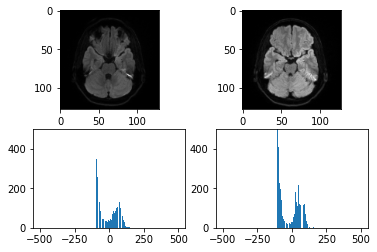

In [155]:
i = 9
j = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].imshow(transformed_images[i], cmap = "gray")
axs[0,1].imshow(transformed_images[j], cmap = "gray")
_ = axs[1,0].hist(transformed_images[i].flatten(), range = [-500, 500], bins = 500)
axs[1,0].set_ylim([0, 500])
_ = axs[1,1].hist(transformed_images[j].flatten(), range = [-500, 500], bins = 500)
axs[1,1].set_ylim([0, 500])

### Zero center and standardize per patient
 Using the z-score normalized data

In [40]:
print(X_norm[3].mean(), X_norm[3].std())

-3.2119919206605467 1.7293299161149736


In [41]:
X_norm_norm = np.empty_like(X_norm)
for i in range(X_norm.shape[0]):
    X_norm_norm[i] = (X_norm[i] - X_norm[i].mean()) / X_norm[i].std()
print(X_norm_norm[3].mean(), X_norm_norm[3].std())

0.0 1.0


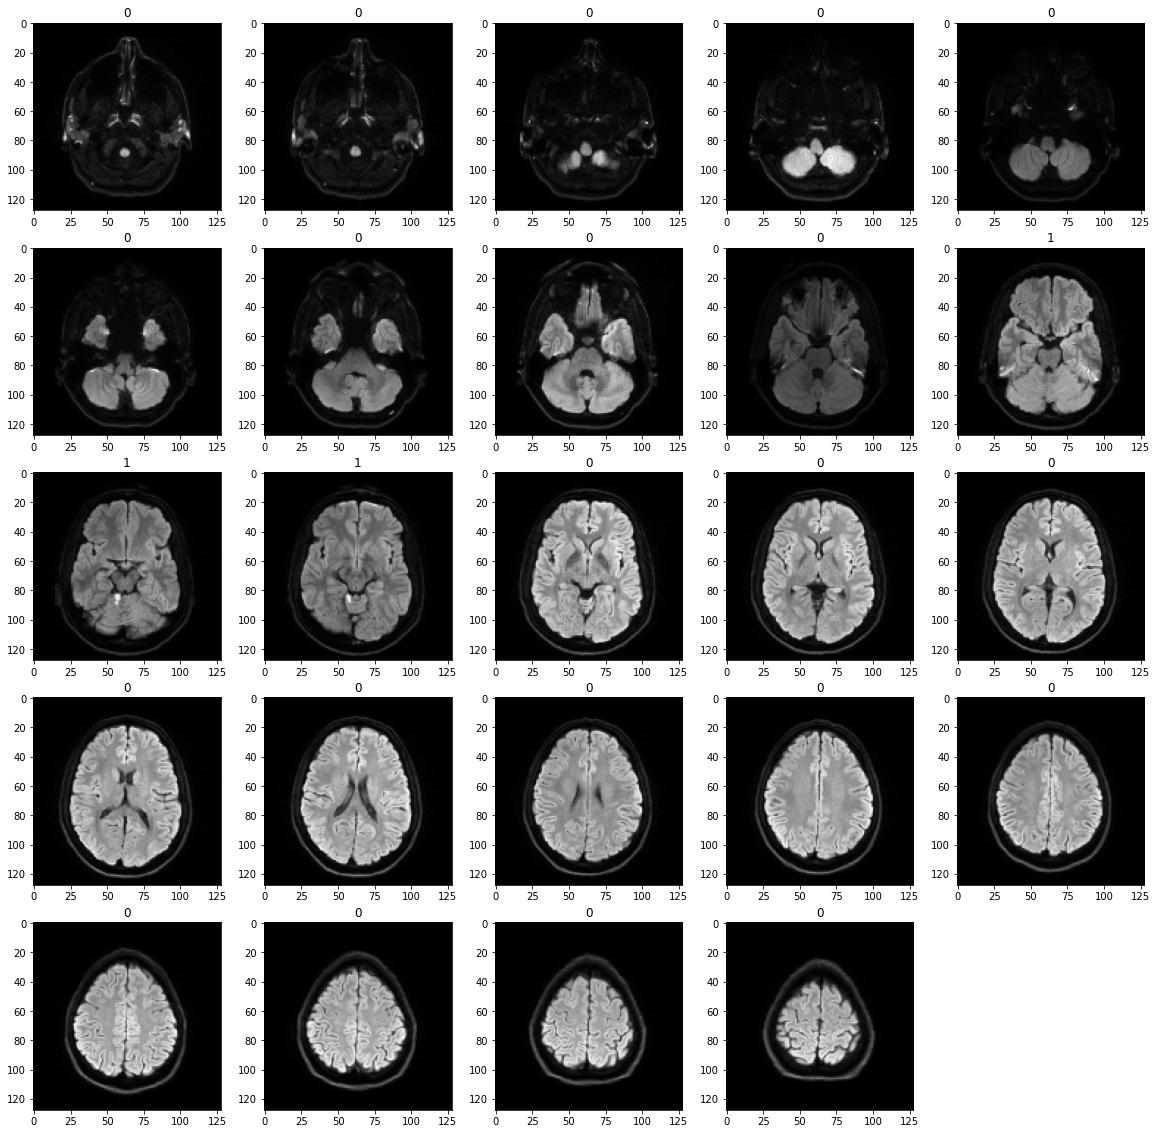

In [42]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_norm_norm[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img[0,i])
    plt.imshow(img, cmap = "gray")
plt.show()

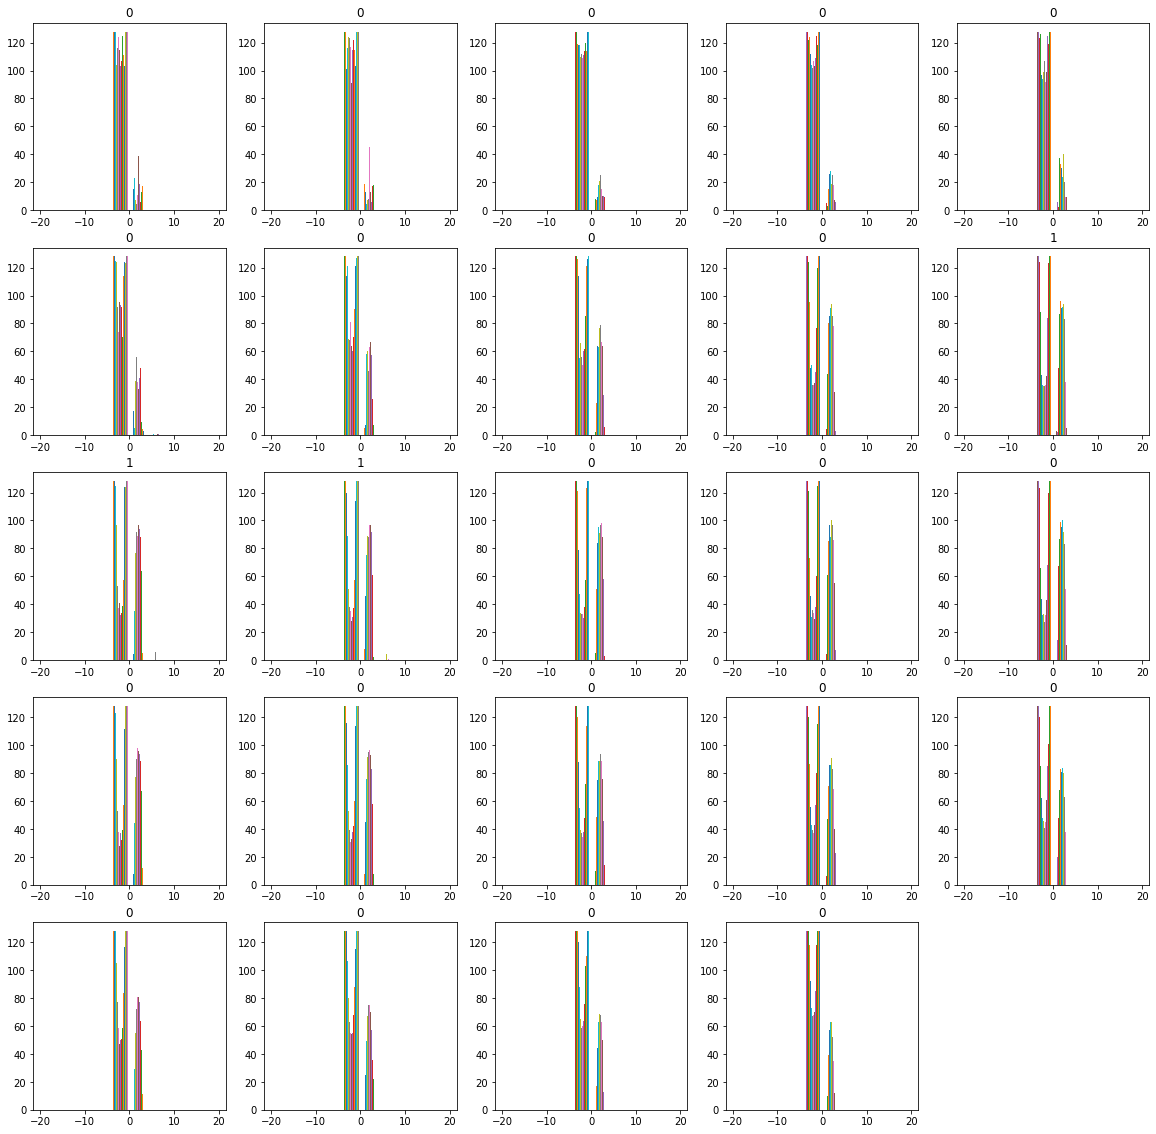

In [43]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_norm_norm[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img[0,i])
    plt.hist(img, range = [-20, 20])
plt.show()

## Summary Preprocessing
- Bias field correction
- Intensity normalization with z-score on brain mask
- Zero center and standardize per sequence

In [44]:
# # normalize the bias field corrected dataset
# X_norm = np.empty_like(X_bf)
# for i in range(X_norm.shape[0]):
#     X_norm[i,:,:,:] = z_score_normalization(X_bf[i,:,:,:], 0, 255)
#     
# print(X_bf.shape, X_bf.min(), X_bf.max())
# print(X_norm.shape, X_norm.min(), X_norm.max())

In [45]:
# # zero center and standardize per patient
# X_norm2 = np.empty_like(X_norm)
# for i in range(X_norm2.shape[0]):
#     X_norm2[i] = (X_norm[i] - X_norm[i].mean()) / X_norm[i].std()
#     
# print(X_norm2.shape, X_norm2.min(), X_norm2.max(), X_norm2.mean(), X_norm2.std())

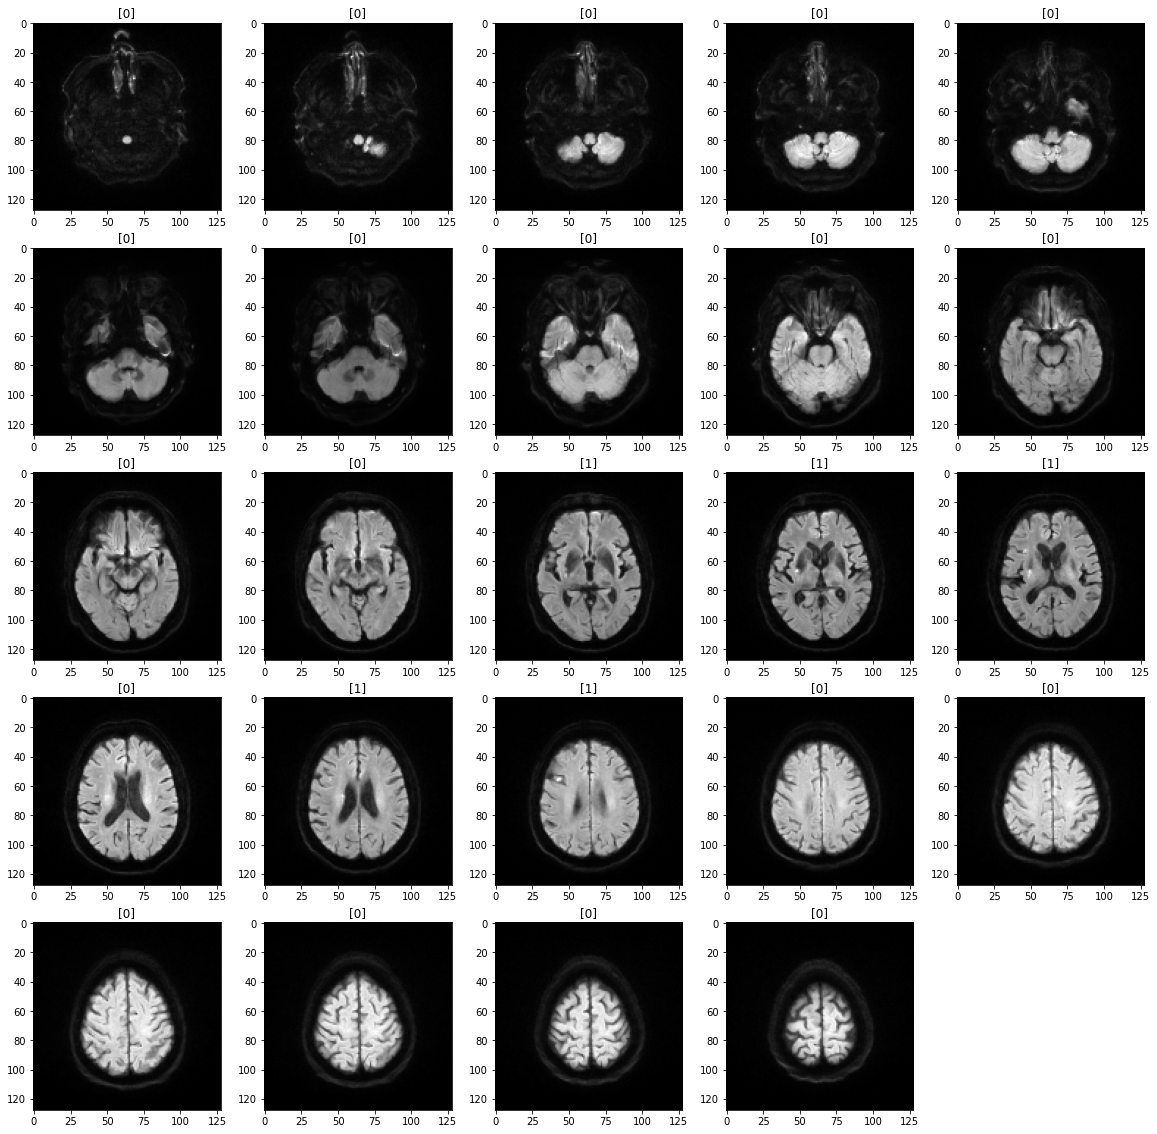

In [46]:
k = np.where(pat == 13)[0]
X_pat = X_norm_norm[k,:,:,:]
Y_img_pat = Y_img[k]

fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[:,i])
    plt.imshow(img, cmap='gray')
plt.show()

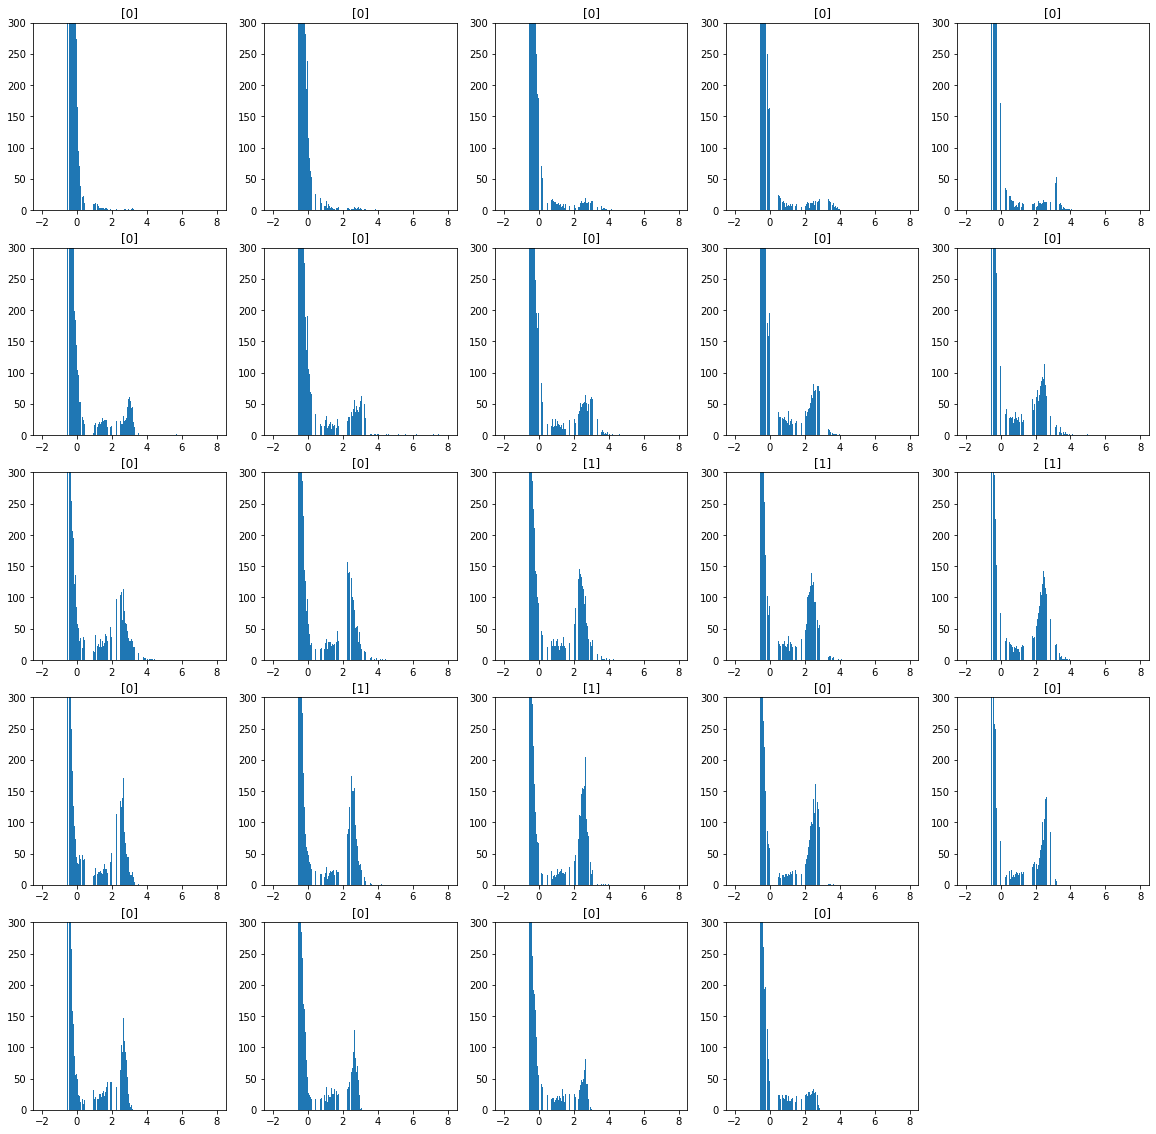

In [47]:
fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[:,i])
    plt.hist(img.flatten(), bins = 500, range = [-2,8])
    plt.ylim([0, 300])
plt.show()

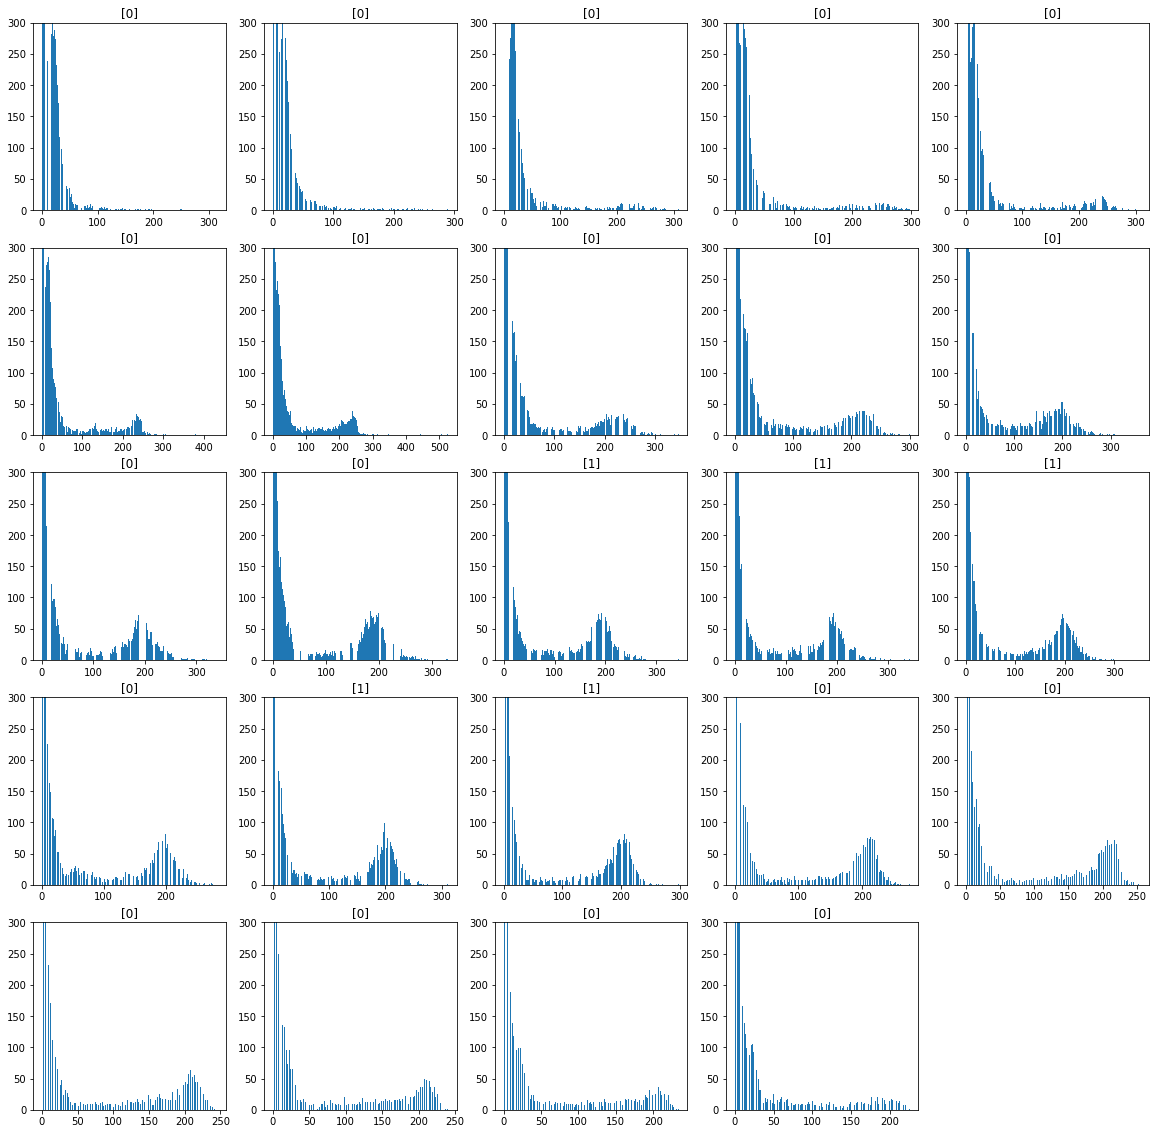

In [49]:
# histograms before preprocessing
k = np.where(pat == 13)[0]
X_pat = X[k,:,:,:]
Y_img_pat = Y_img[k]

fig = plt.figure(figsize = (20, 20)) # total figure size (including all subplots)
columns = 5
rows = 5
fig_all = []
for i in range(1, columns*rows):
    img = X_pat[0,:,:,i]
    fig_all.append(fig.add_subplot(rows, columns, i))
    fig_all[-1].set_title(Y_img_pat[:,i])
    plt.hist(img.flatten(), bins = 500) #, range = [-2,8])
    plt.ylim([0, 300])
plt.show()

In [50]:
# save the preprocessed data
with h5py.File(DIR + 'hezo/stroke_perfusion/data/dicom_2d_192x192x3_clean_interpolated_18_02_2021_preprocessed2.h5', "w") as h5:
    h5.create_dataset("X", data = X_norm_norm)
    h5.create_dataset("Y_img", data = Y_img)
    h5.create_dataset("Y_pat", data = Y_pat)
    h5.create_dataset("pat", data = pat)